In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the training data
train_data = pd.read_csv("/content/Data/train.csv")

#Display the first rows of train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Read the training data
test_data = pd.read_csv("/content/Data/test.csv")

#Display the first rows of train data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

<Axes: xlabel='Age', ylabel='Count'>

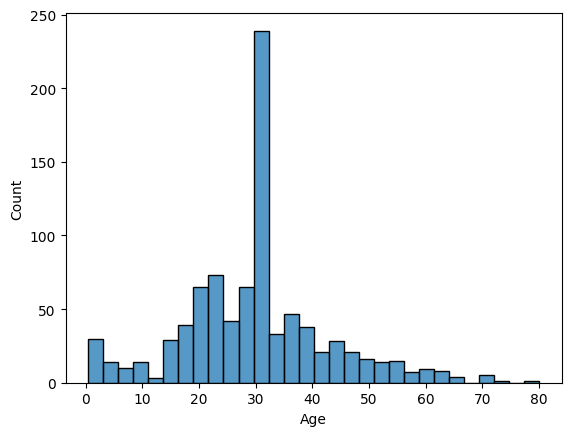

In [36]:
sns.histplot(x='Age', data=train, kde=False)

<BarContainer object of 3 artists>

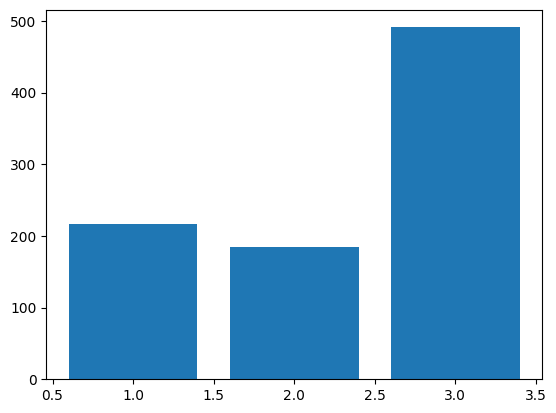

In [35]:
plt.bar(train['Pclass'].unique(), train['Pclass'].value_counts())

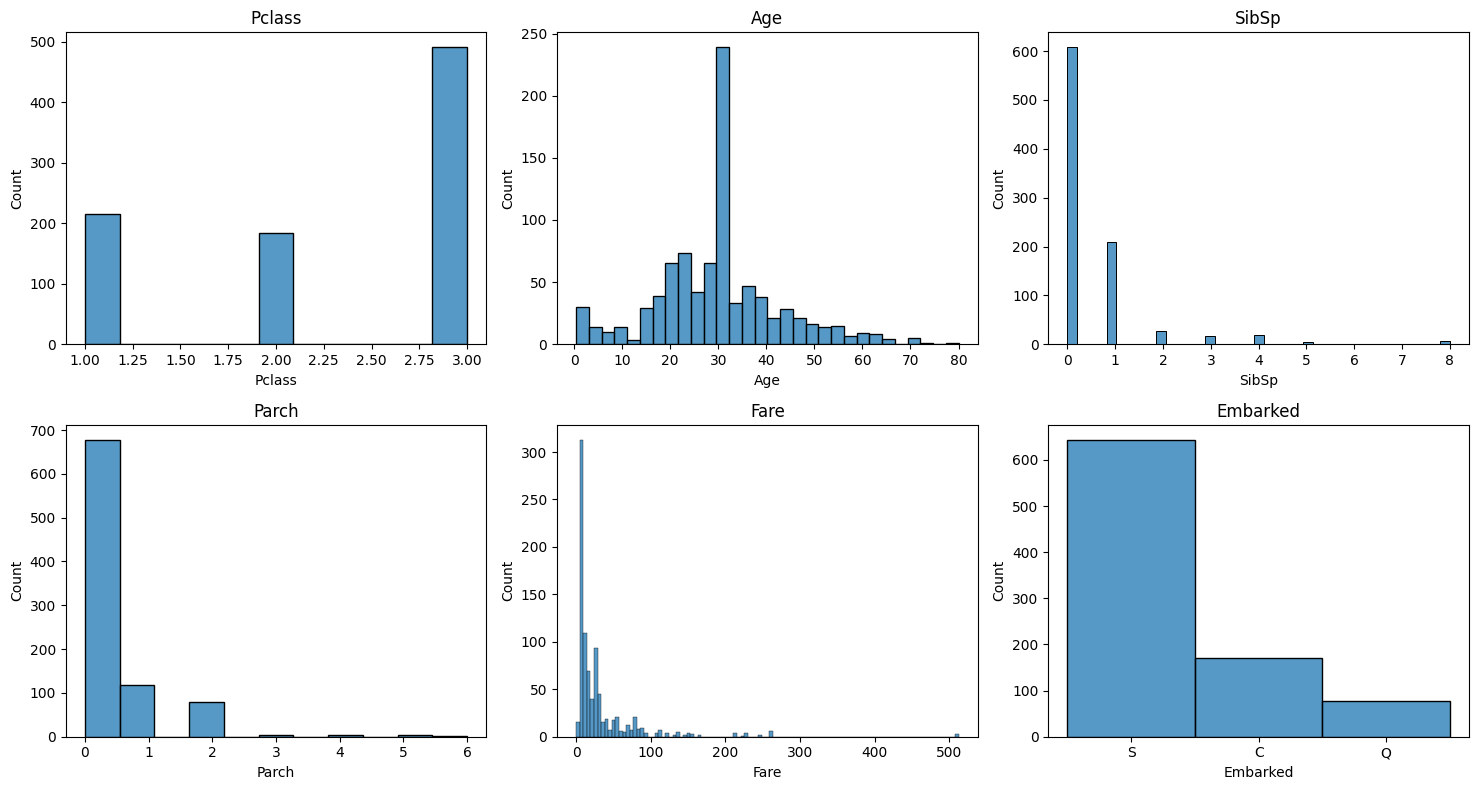

In [34]:
plt.figure(1, figsize=(15, 8))
for i, x in enumerate(['Pclass', 'Age','SibSp','Parch','Fare','Embarked']):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    sns.histplot(train[x])
    plt.title('{}'.format(x))
plt.show()

Text(0, 0.5, 'Frequency')

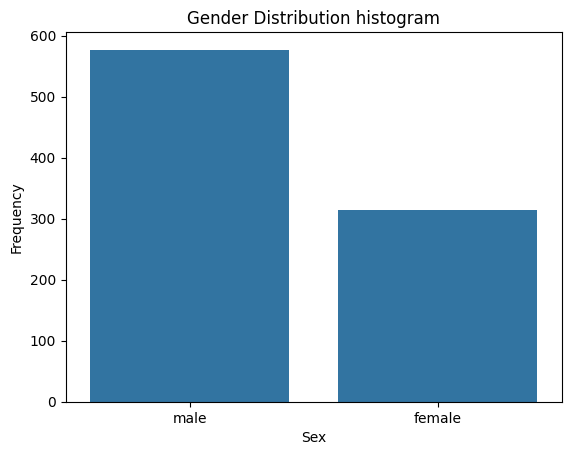

In [32]:
sns.countplot(x='Sex', data=train)
plt.title("Gender Distribution histogram")
plt.xlabel("Sex")
plt.ylabel("Frequency")

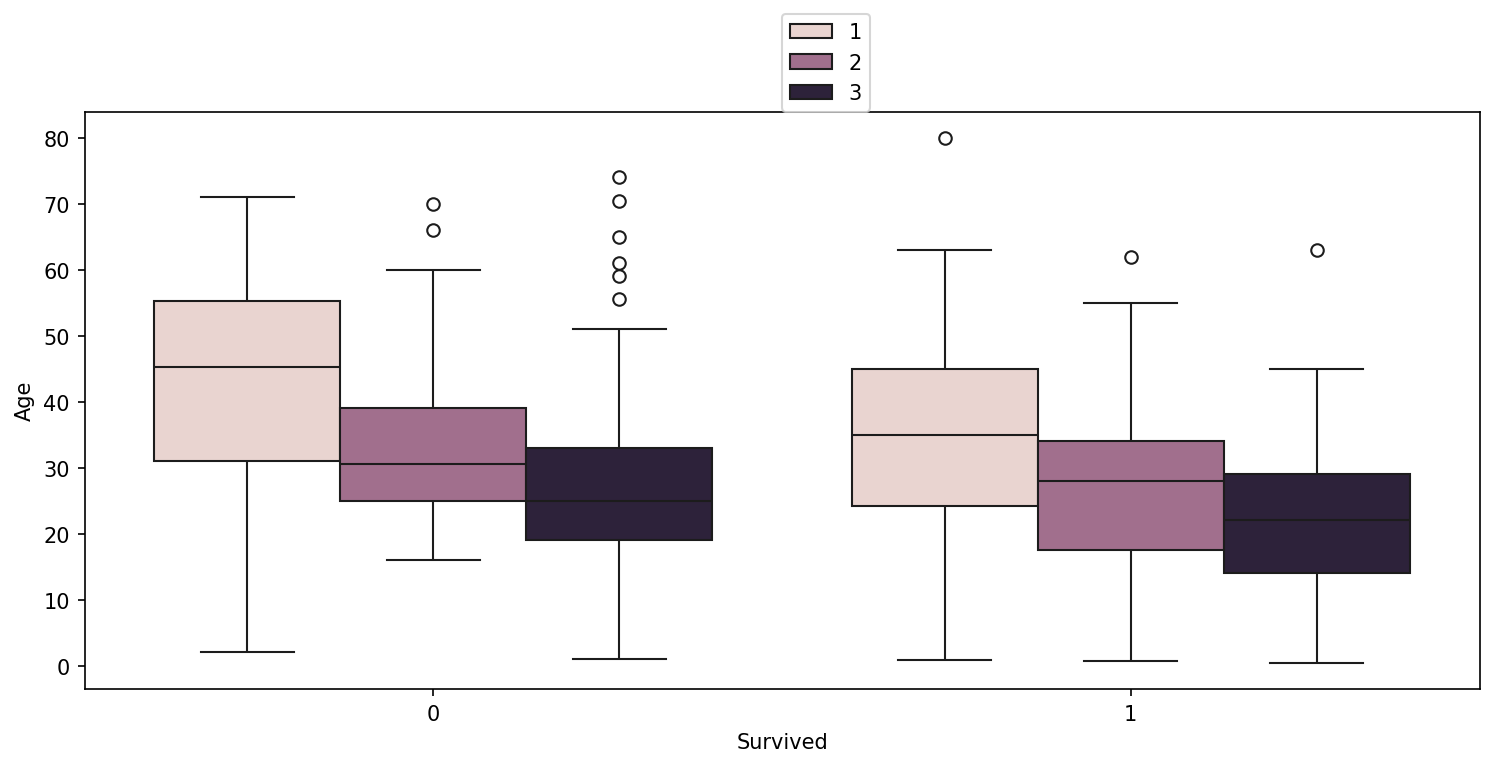

In [7]:
plt.figure(figsize=(12,5), dpi = 150)
sns.boxplot(x='Survived', y='Age', data=train_data, hue= 'Pclass')
plt.legend(loc =(0.5,1))

In [8]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

<Axes: xlabel='Embarked', ylabel='count'>

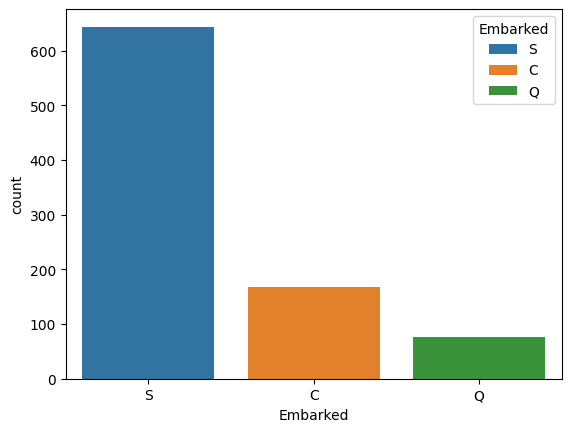

In [9]:
sns.countplot(x='Embarked', data=train, hue = 'Embarked')

In [10]:
train['Embarked'] = train['Embarked'].fillna('C')

In [11]:
X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']

In [12]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [13]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(test)

### Preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(10, input_shape=X_train.shape[1:], kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(200, kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))

# Add more hidden layers
model.add(keras.layers.Dense(100, kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(50, kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

# Output layer
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 batch_normalization (Batch  (None, 10)                40        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 200)               2200      
                                                                 
 batch_normalization_1 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 200)               0

In [18]:
# Compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

In [19]:
# Fit the model
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=200,
                    validation_split=.2

)

Epoch 1/200
23/23 [==============================] - 7s 53ms/step - loss: 0.7060 - accuracy: 0.5674 - val_loss: 0.6369 - val_accuracy: 0.6927
Epoch 2/200
23/23 [==============================] - 0s 19ms/step - loss: 0.6441 - accuracy: 0.6461 - val_loss: 0.6134 - val_accuracy: 0.7598
Epoch 3/200
23/23 [==============================] - 0s 18ms/step - loss: 0.6181 - accuracy: 0.6573 - val_loss: 0.5891 - val_accuracy: 0.7877
Epoch 4/200
23/23 [==============================] - 0s 19ms/step - loss: 0.5957 - accuracy: 0.6980 - val_loss: 0.5598 - val_accuracy: 0.7989
Epoch 5/200
23/23 [==============================] - 0s 14ms/step - loss: 0.5727 - accuracy: 0.7346 - val_loss: 0.5288 - val_accuracy: 0.8045
Epoch 6/200
23/23 [==============================] - 0s 17ms/step - loss: 0.5640 - accuracy: 0.7275 - val_loss: 0.5042 - val_accuracy: 0.8101
Epoch 7/200
23/23 [==============================] - 0s 11ms/step - loss: 0.5348 - accuracy: 0.7556 - val_loss: 0.4820 - val_accuracy: 0.8268
Epoch 

In [29]:
y_pred = model.predict(X_test)

14/14 [==============================] - 0s 7ms/step


### Visualising the training journey

In [21]:
type(history.history)

dict

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss']

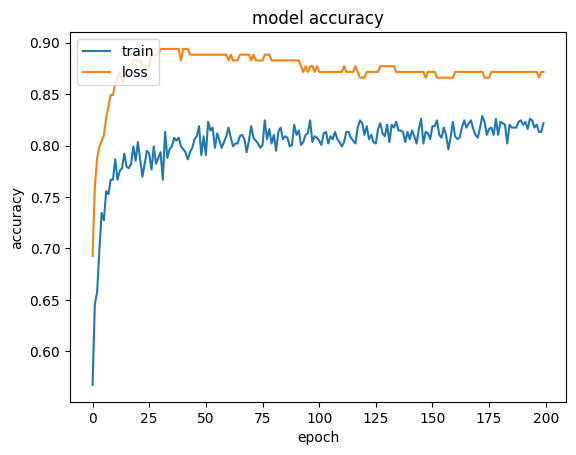

In [24]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()